https://www.insee.fr/fr/statistiques/serie/000442423#Tableau

# Import dependencies

In [7]:
import pandas as pd
from prophet import Prophet
from enum import Enum
import matplotlib.pyplot as plt

# Loading Dataset and Data Cleaning

In [2]:
df = pd.read_csv("evolutionprixpain.csv",sep=";")
df.head()

,Année,Mois,Valeur
0,2021,Octobre,3.59
1,2021,Septembre,3.59
2,2021,Août,3.59
3,2021,Juillet,3.58
4,2021,Juin,3.58


In [3]:
french_month = {"01": "Janvier", "02": "Février", "03": "Mars", 
"04": "Avril", "05": "Mai", "06": "Juin",
"07": "Juillet", "08": "Août", "09": "Septembre", 
"10": "Octobre", "11": "Novembre", "12": "Décembre"}


for k, v in french_month.items():
    df.loc[df.Mois == v, 'Mois'] = k


df['AAAA-MM'] = df['Année'].astype(str) + "-" + df['Mois'].astype(str)

df.columns.drop(['Année','Mois'])

df.rename(columns={'Valeur': 'Y', 'AAAA-MM': 'DS'})

df.head()


,Année,Mois,Valeur,AAAA-MM
0,2021,10,3.59,2021-10
1,2021,09,3.59,2021-09
2,2021,08,3.59,2021-08
3,2021,07,3.58,2021-07
4,2021,06,3.58,2021-06


Text(0, 0.5, 'Prix en € label')

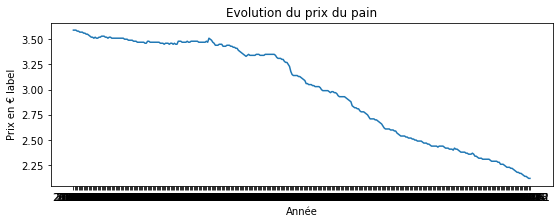

In [4]:
%matplotlib inline

plt.figure(figsize=(9, 3))

plt.plot(df['AAAA-MM'], df['Valeur']) 

plt.title(label="Evolution du prix du pain")
plt.xlabel(xlabel='Année')  
plt.ylabel(ylabel='Prix en € label') 





# Forescast

In [5]:
df_forescast = df[['AAAA-MM', 'Valeur']].copy()
df_forescast.rename(columns={'AAAA-MM': 'ds', 'Valeur': 'y'}, inplace=True, errors='raise')

df_forescast['y'].astype(float)


df_forescast.head()

,ds,y
0,2021-10,3.59
1,2021-09,3.59
2,2021-08,3.59
3,2021-07,3.58
4,2021-06,3.58


In [8]:
m = Prophet()
m.fit(df_forescast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
718,2022-09-27
719,2022-09-28
720,2022-09-29
721,2022-09-30
722,2022-10-01


In [10]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
718,2022-09-27,3.604286,3.585054,3.624415
719,2022-09-28,3.602145,3.582411,3.623580
720,2022-09-29,3.599355,3.582206,3.619425
721,2022-09-30,3.595966,3.576021,3.616228
722,2022-10-01,3.592043,3.572720,3.613415


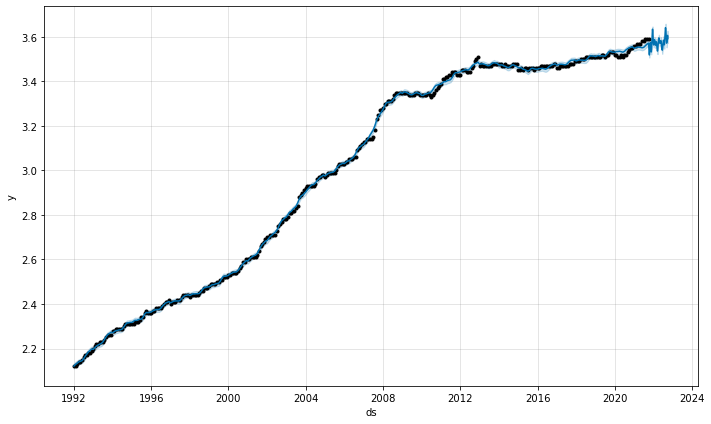

In [11]:
fig1 = m.plot(forecast)

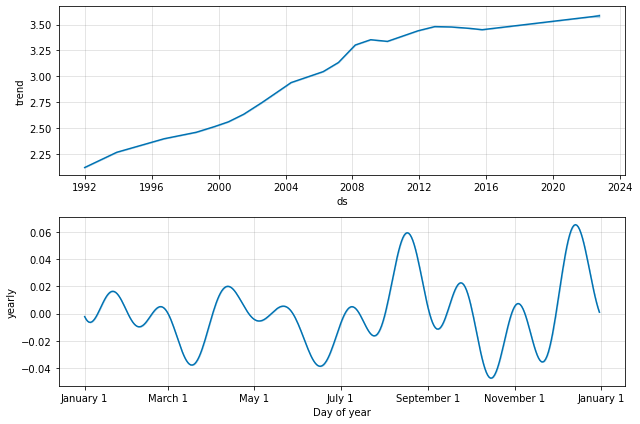

In [12]:
fig2 = m.plot_components(forecast)

In [13]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

NameError: name 'go' is not defined

In [14]:
plot_components_plotly(m, forecast)

NameError: name 'go' is not defined